### Jupyter notebook to read in x, y, u, v from RIVeR output. 

You are looking at a rendering of my Jupyter notbook called `plot_u_v.ipynb`.
Since this is Github, you can download this notebook, or everything in the repository.

Jupyter notebook are a nice way to combine Python or R code and notes in the same place.
The white cells (like this one) are "markdown" cells, where you can use simple formatting commands to make readable notes.

The numbered `In` cells contain Python code that, if this was your notebook, you could run by hitting `shift-enter`.
The `Out` cells display the result of the code.


### Python has millions of packages that help you do stuff

You have to install them in your local environment, and then "import" them to use them in your code.

Here is a good tutorial on how to install the Anaconda distribution of Python and an setup an environment that has many of the packages you will need:
https://ioos.github.io/notebooks_demos/other_resources/

In [1]:
# almost all notebooks us the numpy package, and abbreviate it as np. Similar for the plotting package.
import numpy as np
import matplotlib.pyplot as plt

# this next "magic" commands allows the plots to display inside a Jupyter notebook
%matplotlib inline

### Use the numpy `genfromtxt` command to read in the `.csv` data

I have saved each sheet in the `.xlsx` file as a separate `.csv` file.

In [2]:
x = np.genfromtxt('x.csv', delimiter=',')
y = np.genfromtxt('y.csv', delimiter=',')
u = np.genfromtxt('u.csv', delimiter=',')
v = np.genfromtxt('v.csv', delimiter=',')

### Data are now in memory as 2D numpy arrays

You can see a short display by typing the name

In [3]:
x

array([[-3.25434709, -2.1049377 , -0.95552831, ..., 39.27380032,
        40.42320971, 41.5726191 ],
       [-3.25434709, -2.1049377 , -0.95552831, ..., 39.27380032,
        40.42320971, 41.5726191 ],
       [-3.25434709, -2.1049377 , -0.95552831, ..., 39.27380032,
        40.42320971, 41.5726191 ],
       ...,
       [-3.25434709, -2.1049377 , -0.95552831, ..., 39.27380032,
        40.42320971, 41.5726191 ],
       [-3.25434709, -2.1049377 , -0.95552831, ..., 39.27380032,
        40.42320971, 41.5726191 ],
       [-3.25434709, -2.1049377 , -0.95552831, ..., 39.27380032,
        40.42320971, 41.5726191 ]])

...or get the size

In [4]:
print(np.shape(x))
print(np.shape(y))
print(np.shape(u))
print(np.shape(v))

(40, 40)
(40, 40)
(38, 38)
(38, 38)


It is weird that `x` and `y` are not the same size as `u` and `v`.
You will have to look at the documentation carefully to find out what is going on.

### The `u` and `v` arrays have `nan` in the blank cells

These were blank in the `.xlsx` file and missing between commas in the `.csv` file.

In most arithmatic operations, the combination of a nan and something else will produce a nan. But they are handy as placeholders, especially here, where we want all of the arrays to be the same size.

In [5]:
u

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

`u` and `v` are the horizontal components of the velocity vectors. We can calculate the magnitude of the vectors, which is the same as the speed like this: 

In [6]:
s = np.sqrt(u**2+v**2)
np.shape(s)

(38, 38)

I am making the arrays the same size as `u`, `v`, and`s` by ignoring the first and last rows and columns of the `x` and `y` arrays.

Python indexing starts at zero, so 1 is the second row/column, and -1 is the next to last row/column.

In [7]:
# make clipped x and y arrays
xc = x[1:-1,1:-1]
yc = y[1:-1,1:-1]
print(np.shape(xc))

(38, 38)


### Use `quiver` to plot the vectors

This is colored by `s`, so the high speed arrows are in green and yellow.
This plot is a little disturbing...I'd rather see more coherent flow patterns. Maybe the high-velocity green part is on the river bank.

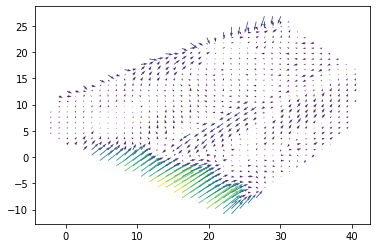

In [8]:
plt.quiver(xc,yc,u,v,s)

Overlay the vectors on the speed. Make the colors a little nicer by changing the range.

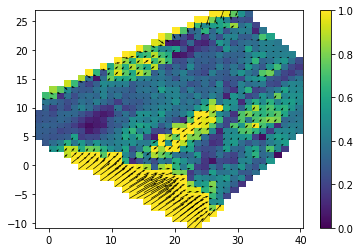

In [9]:
plt.pcolormesh(xc,yc,s,vmin = 0., vmax=5.)
plt.quiver(xc,yc,u,v)
plt.colorbar()